In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn import linear_model as lm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import spacy
import re
import nltk
from nltk import word_tokenize, download
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from keras.utils import np_utils
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import VotingClassifier,BaggingClassifier
from sklearn.cluster import KMeans

https://cienciaenegocios.com/processamento-de-linguagem-natural-nlp/
https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e
https://carlos-bonfim.medium.com/machine-learning-e-processamento-de-linguagem-natural-pln-com-modelos-lineares-d5aaaaf0efa5
https://operdata.com.br/blog/pln-processamento-de-linguagem-natural/

In [2]:
download('punkt')
download('stopwords')
download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\STEFA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\STEFA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\STEFA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Importando o Dataset

In [3]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

Unindo os dataset de treino e teste para facilitar a etapa de limpeza

In [4]:
df = pd.concat([df_train,df_test])

In [5]:
df

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
...,...,...
24995,"For one thing, he produced this movie. It has ...",neg
24996,The title comes from an alteration an adolesce...,pos
24997,Christopher Nolan's first film is a 'no budget...,pos
24998,The story is shortly about the faith-lacking b...,neg


In [8]:
#apenas para testar o algoritmo por causa da memoria
#df = df_train

In [6]:
def sentiment_categorization(df):
    df.loc[df.sentiment=='neg','sentiment_cate'] = 0
    df.loc[df.sentiment=='pos','sentiment_cate'] = 1
    return df

df = sentiment_categorization(df)

In [7]:
df.dtypes

text               object
sentiment          object
sentiment_cate    float64
dtype: object

In [8]:
df.sample(5)

,text,sentiment,sentiment_cate
7773,Yet another foreign war movie that puts hollyw...,pos,1.0
19414,I actually paid to see this movie in the theat...,neg,0.0
1754,very disappointing and incoherent - every now ...,neg,0.0
12397,"I instantly fell in love with ""Pushing Daisies...",pos,1.0
2606,I guess that after Leonard Nimoy had been succ...,neg,0.0


### Limpeza e Pré-Processamento

#### Normalização
O processo de normalização no Processamento de Linguagem Natural trata de colocar todas as palavras em caixa baixa, retirando os acentos ou cedilha. Isto faz com que os algoritmos de análise não tratem palavras iguais como sendo diferentes apenas por apresentarem a letra inicial como maiúscula, ou um erro de acentuação, por exemplo.

1. Transformar coluna 'text' em list para facilitar a manipulação

In [9]:
df_list = list(df['text'][:3])
df_list[0]

"Now, I won't deny that when I purchased this off eBay, I had high expectations. This was an incredible out-of-print work from the master of comedy that I so enjoy. However, I was soon to be disappointed. Apologies to those who enjoyed it, but I just found the Compleat Al to be very difficult to watch. I got a few smiles, sure, but the majority of the funny came from the music videos (which I've got on DVD) and the rest was basically filler. You could tell that this was not Al's greatest video achievement (that honor goes to UHF). Honestly, I doubt if this will ever make the jump to DVD, so if you're an ultra-hardcore Al fan and just HAVE to own everything, buy the tape off eBay. Just don't pay too much for it."

2. Remover caracteres desnecessários e transformar todos os caracteres para minusculo

In [10]:
def pre_processing(textos):
    caracteres_1 = re.compile("[.;:!\'?@,\"()\[\]]")
    caracteres_2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    caracteres_3 = re.compile('[^A-Za-z0-9\s]+')

    textos = [caracteres_1.sub("", texto) for texto in textos]
    textos = [caracteres_2.sub(" ", texto.lower()) for texto in textos]
    textos = [caracteres_3.sub("", texto) for texto in textos]
    
    return textos

df_processed = pre_processing(df_list)

In [11]:
df_processed[0]

'now i wont deny that when i purchased this off ebay i had high expectations this was an incredible out of print work from the master of comedy that i so enjoy however i was soon to be disappointed apologies to those who enjoyed it but i just found the compleat al to be very difficult to watch i got a few smiles sure but the majority of the funny came from the music videos which ive got on dvd and the rest was basically filler you could tell that this was not als greatest video achievement that honor goes to uhf honestly i doubt if this will ever make the jump to dvd so if youre an ultra hardcore al fan and just have to own everything buy the tape off ebay just dont pay too much for it'

#### Tokenização

In [12]:
#word_tokenize(df_processed[0])

In [13]:
df_tokens = [word_tokenize(text) for text in df_processed]

In [14]:
str(df_tokens[0])

"['now', 'i', 'wont', 'deny', 'that', 'when', 'i', 'purchased', 'this', 'off', 'ebay', 'i', 'had', 'high', 'expectations', 'this', 'was', 'an', 'incredible', 'out', 'of', 'print', 'work', 'from', 'the', 'master', 'of', 'comedy', 'that', 'i', 'so', 'enjoy', 'however', 'i', 'was', 'soon', 'to', 'be', 'disappointed', 'apologies', 'to', 'those', 'who', 'enjoyed', 'it', 'but', 'i', 'just', 'found', 'the', 'compleat', 'al', 'to', 'be', 'very', 'difficult', 'to', 'watch', 'i', 'got', 'a', 'few', 'smiles', 'sure', 'but', 'the', 'majority', 'of', 'the', 'funny', 'came', 'from', 'the', 'music', 'videos', 'which', 'ive', 'got', 'on', 'dvd', 'and', 'the', 'rest', 'was', 'basically', 'filler', 'you', 'could', 'tell', 'that', 'this', 'was', 'not', 'als', 'greatest', 'video', 'achievement', 'that', 'honor', 'goes', 'to', 'uhf', 'honestly', 'i', 'doubt', 'if', 'this', 'will', 'ever', 'make', 'the', 'jump', 'to', 'dvd', 'so', 'if', 'youre', 'an', 'ultra', 'hardcore', 'al', 'fan', 'and', 'just', 'have',

#### Stop words
As stop words são palavras que não adicionam sentido ao texto, pois são usadas para coesão e dar contexto, mas não fazem sentido específico quando olhadas individualmente. Portanto, o processo necessário em análises que usam Processamento de Linguagem Natural é eliminar as palavras vazias (stop words).

In [15]:
stop_words = stopwords.words('english')

In [16]:
df_without_sw = [[token for token in text if token not in stop_words]
                  for text in df_tokens]

In [17]:
print('Tamanho do texto com stop words: '+str(len(df_tokens[0])))
print('Tamanho do texto sem stop words: '+str(len(df_without_sw[0])))

Tamanho do texto com stop words: 140
Tamanho do texto sem stop words: 63


#### Lematização

In [18]:
lematizer = WordNetLemmatizer()
df_lematizer = [[lematizer.lemmatize(token) for token in text] for text in df_without_sw]

#### Stemização
O termo stemização vem do inglês stemming, e representa o processo de reduzir palavras flexionadas ou derivadas a sua base. Neste processo a tarefa é transformar palavras próximas em uma só, como ficar apenas com o radical dos verbos ou transformar todos os substantivos para o singular.

In [19]:
stemization = LancasterStemmer()
df_stemization = [[stemization.stem(token) for token in text] for text in df_lematizer]

Comparação das etapas de limpeza

In [20]:
str(df_without_sw[0])

"['wont', 'deny', 'purchased', 'ebay', 'high', 'expectations', 'incredible', 'print', 'work', 'master', 'comedy', 'enjoy', 'however', 'soon', 'disappointed', 'apologies', 'enjoyed', 'found', 'compleat', 'al', 'difficult', 'watch', 'got', 'smiles', 'sure', 'majority', 'funny', 'came', 'music', 'videos', 'ive', 'got', 'dvd', 'rest', 'basically', 'filler', 'could', 'tell', 'als', 'greatest', 'video', 'achievement', 'honor', 'goes', 'uhf', 'honestly', 'doubt', 'ever', 'make', 'jump', 'dvd', 'youre', 'ultra', 'hardcore', 'al', 'fan', 'everything', 'buy', 'tape', 'ebay', 'dont', 'pay', 'much']"

In [21]:
str(df_lematizer[0])

"['wont', 'deny', 'purchased', 'ebay', 'high', 'expectation', 'incredible', 'print', 'work', 'master', 'comedy', 'enjoy', 'however', 'soon', 'disappointed', 'apology', 'enjoyed', 'found', 'compleat', 'al', 'difficult', 'watch', 'got', 'smile', 'sure', 'majority', 'funny', 'came', 'music', 'video', 'ive', 'got', 'dvd', 'rest', 'basically', 'filler', 'could', 'tell', 'al', 'greatest', 'video', 'achievement', 'honor', 'go', 'uhf', 'honestly', 'doubt', 'ever', 'make', 'jump', 'dvd', 'youre', 'ultra', 'hardcore', 'al', 'fan', 'everything', 'buy', 'tape', 'ebay', 'dont', 'pay', 'much']"

In [22]:
str(df_stemization[0])

"['wont', 'deny', 'purchas', 'ebay', 'high', 'expect', 'incred', 'print', 'work', 'mast', 'comedy', 'enjoy', 'howev', 'soon', 'disappoint', 'apolog', 'enjoy', 'found', 'compl', 'al', 'difficult', 'watch', 'got', 'smil', 'sur', 'maj', 'funny', 'cam', 'mus', 'video', 'iv', 'got', 'dvd', 'rest', 'bas', 'fil', 'could', 'tel', 'al', 'greatest', 'video', 'achiev', 'hon', 'go', 'uhf', 'honest', 'doubt', 'ev', 'mak', 'jump', 'dvd', 'yo', 'ultr', 'hardc', 'al', 'fan', 'everyth', 'buy', 'tap', 'ebay', 'dont', 'pay', 'much']"

##### Função para realizar essas etapas em todo o dataset

In [23]:
def processamento_nltk(df):    
    text_processado = list()
    df_processed = pre_processing(df)
    df_processed = [word_tokenize(text) for text in df_processed]
    
    stop_words = stopwords.words('english')
    df_processed = [[token for token in text if token not in stop_words]
                  for text in df_processed]
    
    lematizer = WordNetLemmatizer()
    df_processed = [[lematizer.lemmatize(token) for token in text] for text in df_processed]
    
    stemization = LancasterStemmer()
    df_processed = [[stemization.stem(token) for token in text] for text in df_processed]
    
    for frase in df_processed:
        text_processado.append(' '.join(frase))
        
    return text_processado
    

In [24]:
#tokeniza e remove as stop words, salvando o lemma
def processamento_spacy(df):
    df_tokens = list()
    df = pre_processing(df)
    df_processado = list()
    nlp = spacy.load("en_core_web_sm")
    for text in df:
        tokens = list()
        doc = nlp(text)
        for token in doc:
            if(not(token.is_stop)):
                tokens.append(token.lemma_)
        df_tokens.append(tokens)
    
    for frase in df_tokens:
        df_processado.append(' '.join(frase))
    return df_processado

In [25]:
df_list = list(df['text'])
df['text_processed_nltk'] = processamento_nltk(df_list)

In [26]:
df['text_processed_spacy'] = processamento_spacy(df_list)

In [27]:
#df['text_processed'] = df_processado
df.to_csv('dataset/df_processado_completo.csv')

In [28]:
df.sample(5)

,text,sentiment,sentiment_cate,text_processed_nltk,text_processed_spacy
16374,This is one of the best movies on the French R...,pos,1.0,on best movy french revolv ev produc person we...,good movie french revolution produce person ve...
1378,Anna Christie (1931)<br /><br />On its own ter...,pos,1.0,ann christie 1931 term vert garbo ann christie...,anna christie 1931 term version garbo anna chr...
9339,Something strange is happening in remote areas...,neg,0.0,someth strange hap remot are arct air forc wea...,strange happen remote area arctic air force we...
7828,The TV show was slow moving and the 'offbeat' ...,neg,0.0,tv show slow mov offb charact sometim irrit mi...,tv slow move offbeat character irritate miracl...
15096,I am assuming that the rave reviews on this pa...,neg,0.0,assum rav review pag peopl nev read book unfor...,assume rave review page people read book un...


#### Divisão dos dados em treino e teste

In [29]:
df_train = pd.read_csv("dataset/df_processado_completo.csv")
X = df_train['text_processed_nltk']
y = df_train['sentiment_cate'].to_numpy()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

In [245]:
#y_train = np_utils.to_categorical(y_train,2)
#y_test = np_utils.to_categorical(y_test,2)

#### Vetorização - Bag of words

In [31]:
vetorizer = CountVectorizer()
X_train = vetorizer.fit_transform(X_train)
X_test = vetorizer.transform(X_test)

In [32]:
transformer = TfidfTransformer()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

#### Score (melhorar visualização)

In [33]:
def score(y_test,y_pred):
    y_score = accuracy_score(y_test,y_pred)
    y_recall = recall_score(y_test,y_pred)
    y_f1_score = f1_score(y_test,y_pred)
    y_precision = precision_score(y_test,y_pred)
    print('Acuracia: ' + str(y_score))
    print('Recall: ' + str(y_recall))
    print('F1 Score: '+ str(y_f1_score))
    print('Precisão: ' + str(y_precision))
    
    matrix = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(y_score)
    plt.title(all_sample_title, size = 15);

### Classificação

#### Regressão Logistica

In [34]:
model_LR = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=42)
model_LR = model_LR.fit(X_train, y_train)

In [35]:
pred_LR = model_LR.predict(X_test)

Acuracia: 0.8923
Recall: 0.9026
F1 Score: 0.893398000593883
Precisão: 0.8843817362335881


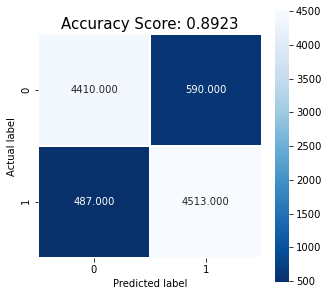

In [37]:
score(y_test,pred_LR)

#### KNN

In [38]:
#Instanciando o modelo
knn = KNeighborsClassifier(n_neighbors=30)
#Treinando o modelo
model_knn = knn.fit(X_train,y_train)

In [39]:
#realizando a predição
pred_knn = model_knn.predict(X_test)

Acuracia: 0.7955
Recall: 0.8284
F1 Score: 0.8020137477006487
Precisão: 0.7772565209232501


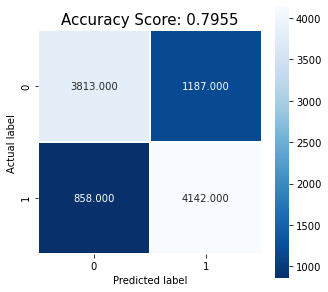

In [40]:
score(y_test,pred_knn)

#### Naive Bayes

In [41]:
naive = MultinomialNB() #bernoulliNB
model_naive = naive.fit(X_train,y_train)

In [42]:
pred_naive = model_naive.predict(X_test)

Acuracia: 0.8623
Recall: 0.8492
F1 Score: 0.8604721856317762
Precisão: 0.8720476483877593


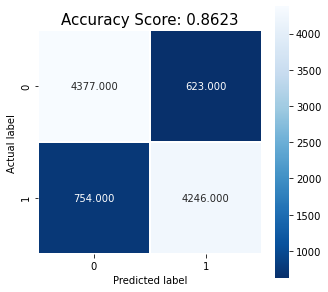

In [43]:
score(y_test,pred_naive)

#### Arvores de decisão

In [44]:
tree = DecisionTreeClassifier(criterion = 'gini',random_state=42,max_depth=15)
model_tree = tree.fit(X_train, y_train)

In [45]:
pred_tree = model_tree.predict(X_test)

Acuracia: 0.7388
Recall: 0.8196
F1 Score: 0.7583271650629164
Precisão: 0.7055785123966942


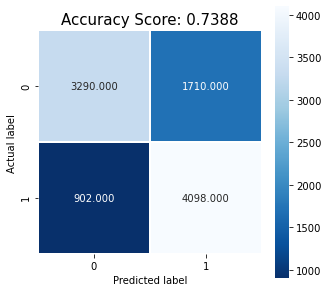

In [46]:
score(y_test,pred_tree)

#### Random Forest

In [47]:
random_forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1,random_state=42)
model_rf = random_forest.fit(X_train, y_train)

In [48]:
pred_rf = model_rf.predict(X_test)

Acuracia: 0.8404
Recall: 0.8724
F1 Score: 0.8453488372093023
Precisão: 0.8199248120300752


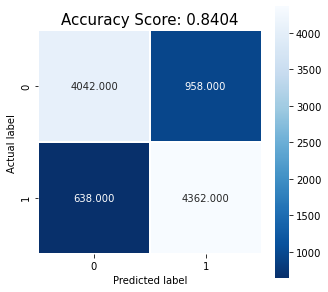

In [49]:
score(y_test,pred_rf)

#### MLP Classifier

In [64]:
mlp = MLPClassifier(random_state=1, max_iter=500) 
model_mlp = mlp.fit(X_train, y_train)                 

C:\Users\STEFA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [65]:
pred_mlp = model_mlp.predict(X_test)

Acuracia: 0.8669
Recall: 0.874
F1 Score: 0.8678383477311091
Precisão: 0.8617629658844409


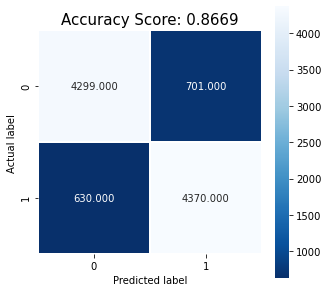

In [66]:
score(y_test,pred_mlp)

#### Perceptron

In [67]:
ptn = Perceptron(max_iter=500)                    
model_ptn = ptn.fit(X_train, y_train)                   


In [68]:
pred_ptn = model_ptn.predict(X_test) 

Acuracia: 0.8572
Recall: 0.884
F1 Score: 0.8609271523178808
Precisão: 0.8390280941533789


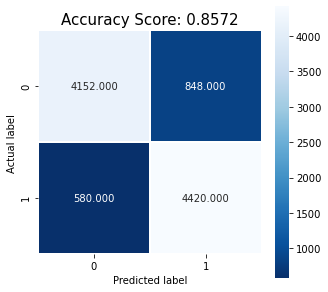

In [69]:
score(y_test,pred_ptn)

#### Ensemble

In [70]:
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
naive_clf = MultinomialNB()
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1,random_state=42)

In [71]:
voting_clf = VotingClassifier(
 estimators=[('lr', lr_clf), ('naive', naive_clf), ('rf', rf_clf)],
 voting='hard')

In [72]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('naive', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(max_leaf_nodes=16,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=42))])

In [73]:
pred_clf = voting_clf.predict(X_test) 

Acuracia: 0.8832
Recall: 0.8904
F1 Score: 0.8840349483717236
Precisão: 0.8777602523659306


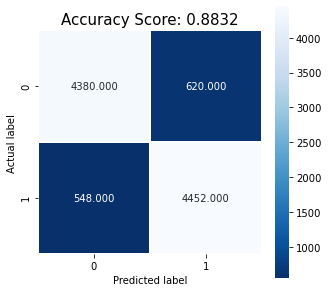

In [74]:
score(y_test,pred_clf)

In [75]:
for clf in (lr_clf, naive_clf, rf_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8923
MultinomialNB 0.8623
RandomForestClassifier 0.8404
VotingClassifier 0.8832


#### Bagging

In [76]:
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1,random_state=42)
bag_clf = BaggingClassifier(rf_clf)
bag_clf.fit(X_train, y_train)
pred_bag = bag_clf.predict(X_test)

Acuracia: 0.8832
Recall: 0.8904
F1 Score: 0.8840349483717236
Precisão: 0.8777602523659306


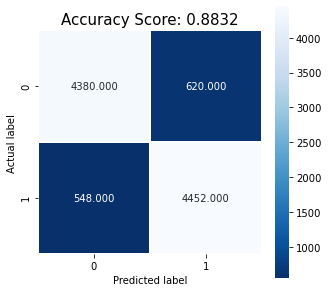

In [77]:
score(y_test,y_pred)